In [1]:
import io
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import json
import warnings
warnings.filterwarnings('ignore')
import base64
import codecs
from IPython.display import HTML

%matplotlib inline

In [2]:
import random as rnd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('IMDb Movies India.csv', engine = 'python')
df.dropna(inplace=True)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [4]:
df.duplicated().sum()
df[df.duplicated()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3


In [5]:
duplicate = df.groupby(['Name', 'Year']).filter(lambda x: len(x) > 1)
duplicate.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
6062,India's Daughter,(2015),63 min,"Documentary, Biography, Crime",8.2,"1,998",Leslee Udwin,Asha Devi,Badri Singh,Satendra
6063,India's Daughter,(2015),120 min,"Action, Crime, Drama",6.9,21,Rupesh Paul,Omkar Das Manikpuri,Amann Grewal,Vishal Om Prakash
12420,Sant Dnyaneshwar,(1940),139 min,Fantasy,7.9,45,Vishnupant Govind Damle,Sheikh Fattelal,Shahu Modak,Datta Dharmadhikari
12421,Sant Dnyaneshwar,(1940),137 min,Biography,8.1,9,Vishnupant Govind Damle,Sheikh Fattelal,Shahu Modak,Datta Dharmadhikari


In [6]:
df = df.drop_duplicates(subset=['Name','Year'], keep=False)
df.shape

(5655, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5655 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5655 non-null   object 
 1   Year      5655 non-null   object 
 2   Duration  5655 non-null   object 
 3   Genre     5655 non-null   object 
 4   Rating    5655 non-null   float64
 5   Votes     5655 non-null   object 
 6   Director  5655 non-null   object 
 7   Actor 1   5655 non-null   object 
 8   Actor 2   5655 non-null   object 
 9   Actor 3   5655 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.0+ KB


In [8]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

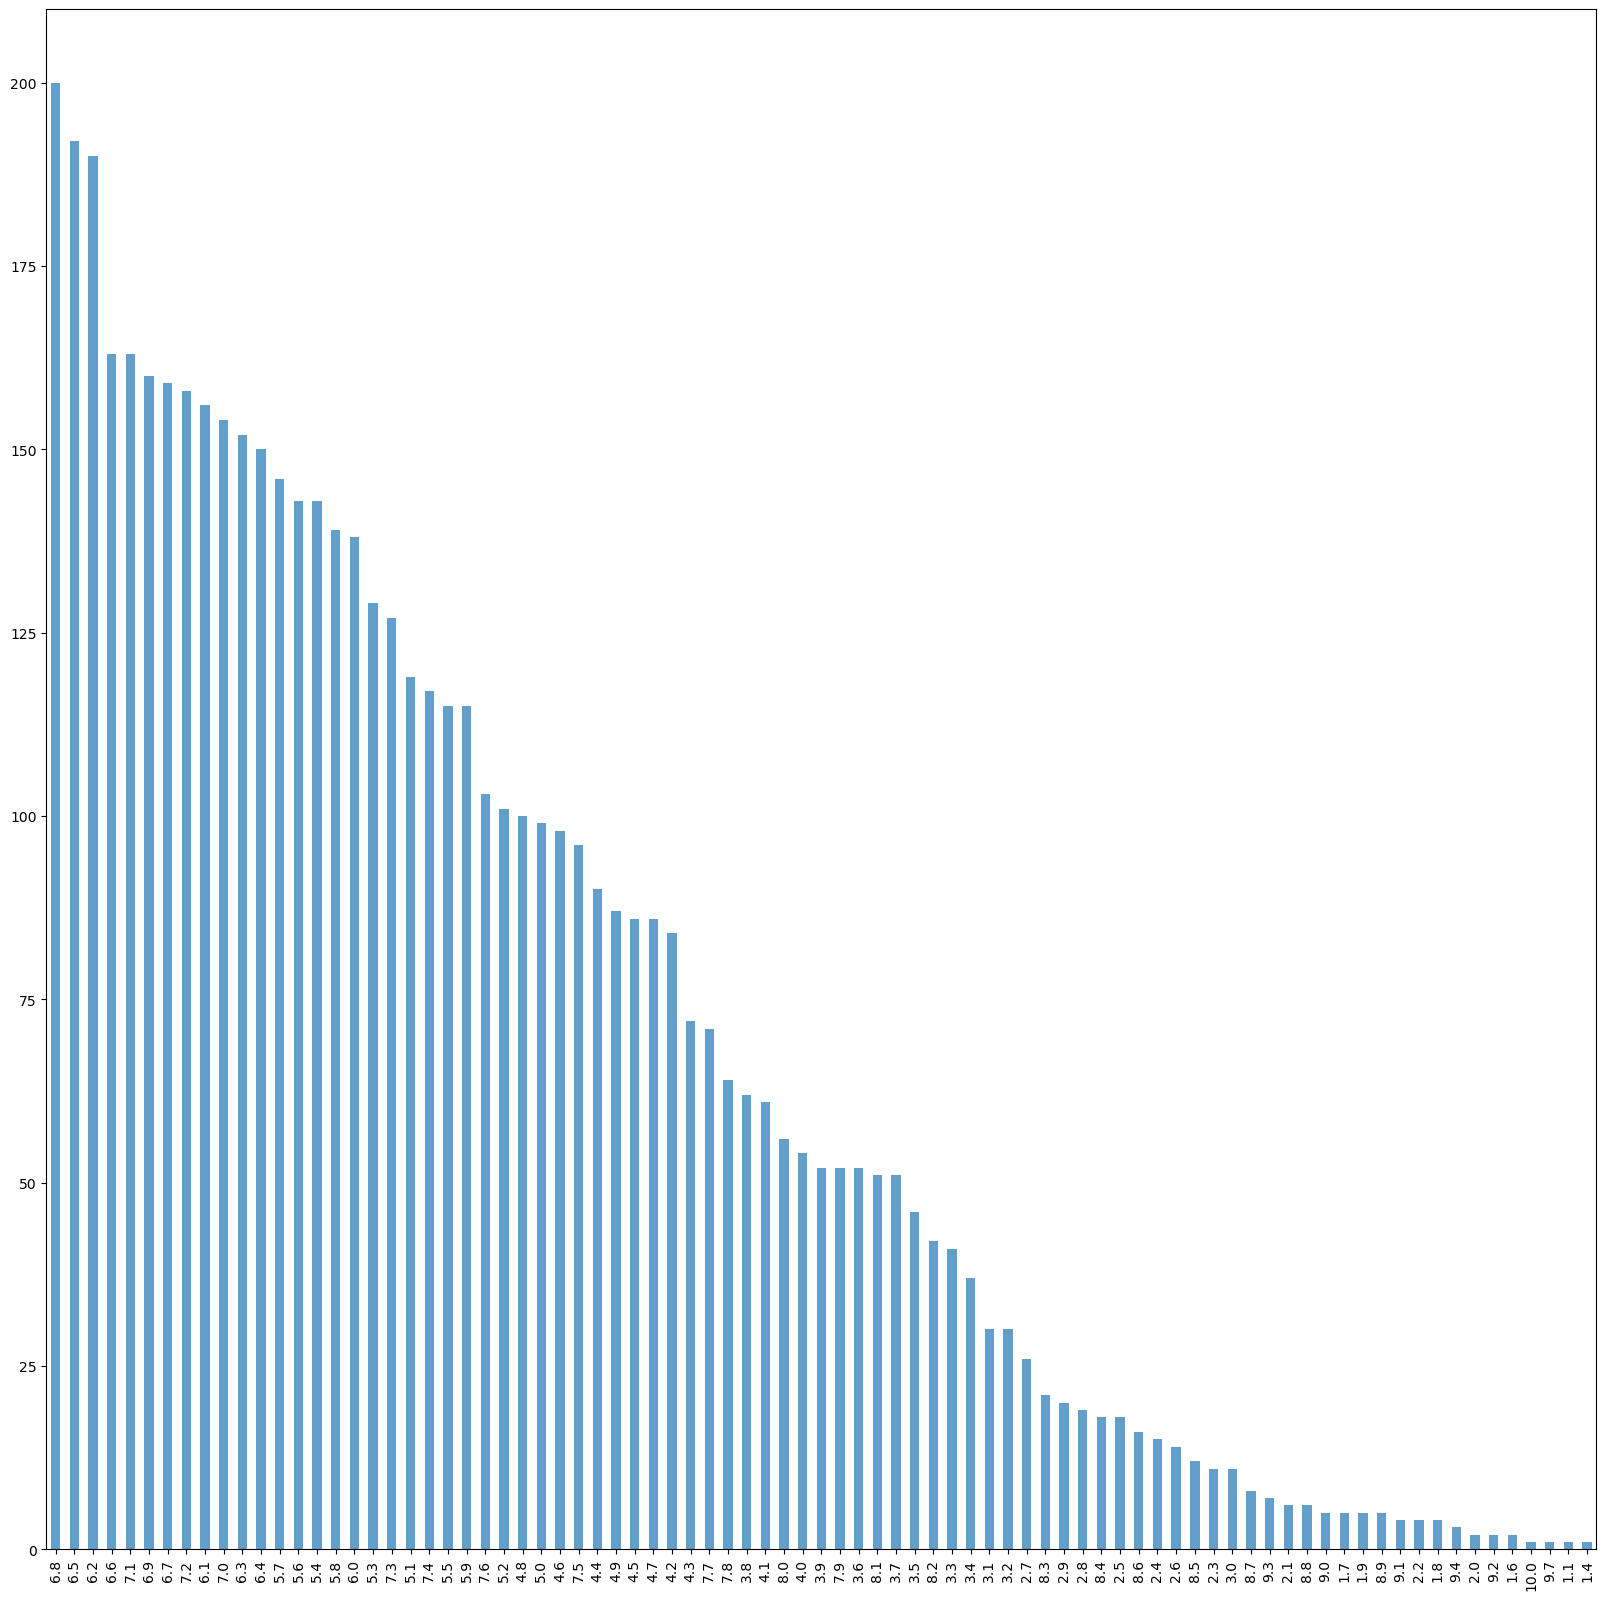

In [9]:
df['Rating'].value_counts().plot(kind='bar',alpha=0.7,figsize=(20,20))
plt.show()

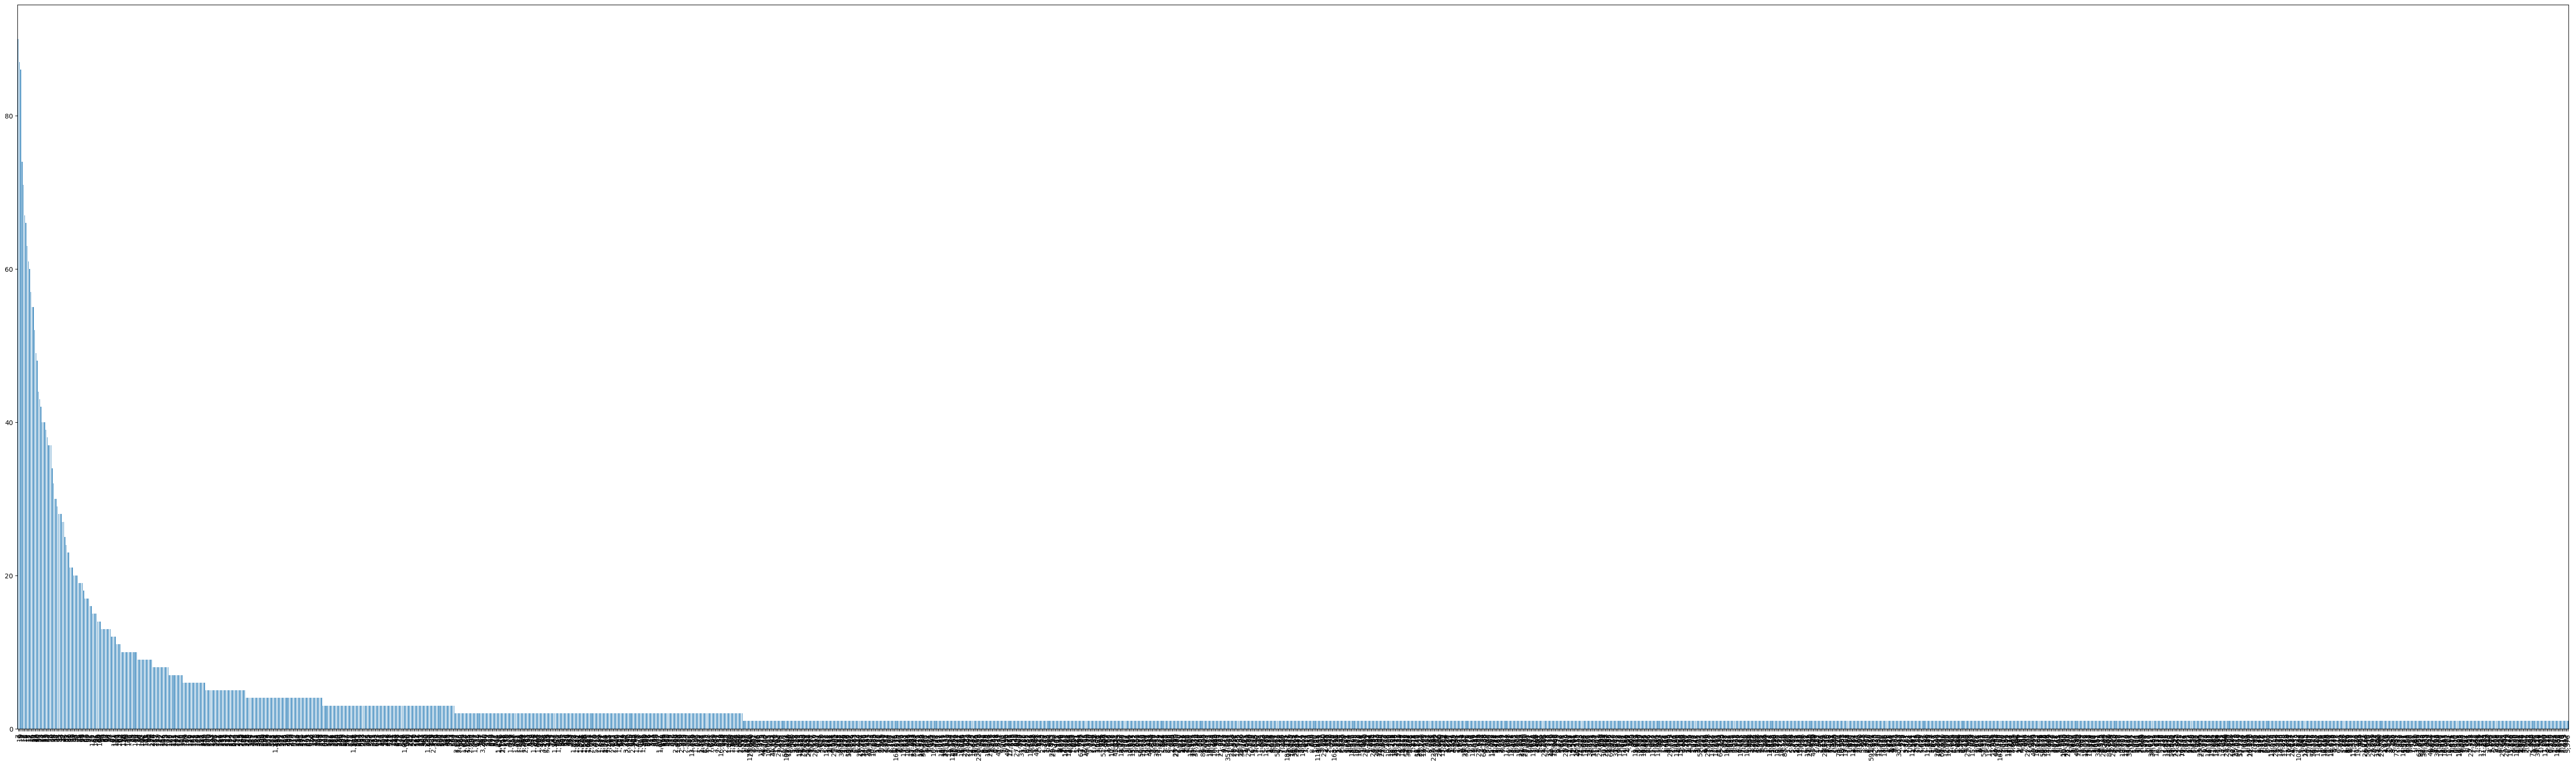

In [10]:
df['Votes'].value_counts().plot(kind='bar',alpha=0.9,figsize=(70,20))
plt.show()

In [11]:
groupedby_Name = df.groupby('Name')
groupedby_rating = df.groupby('Rating')

In [12]:
movies = df.groupby('Name').size().sort_values(ascending=True)[:2000]
print(movies)

Name
#Gadhvi (He thought he was Gandhi)    1
Noorjehan                             1
Noorie                                1
Noor                                  1
Noise of Silence                      1
                                     ..
Saina                                 1
Sainik                                1
Samarat Prithviraj Chauvan            1
Samarasimha Reddy                     1
Samar                                 1
Length: 2000, dtype: int64


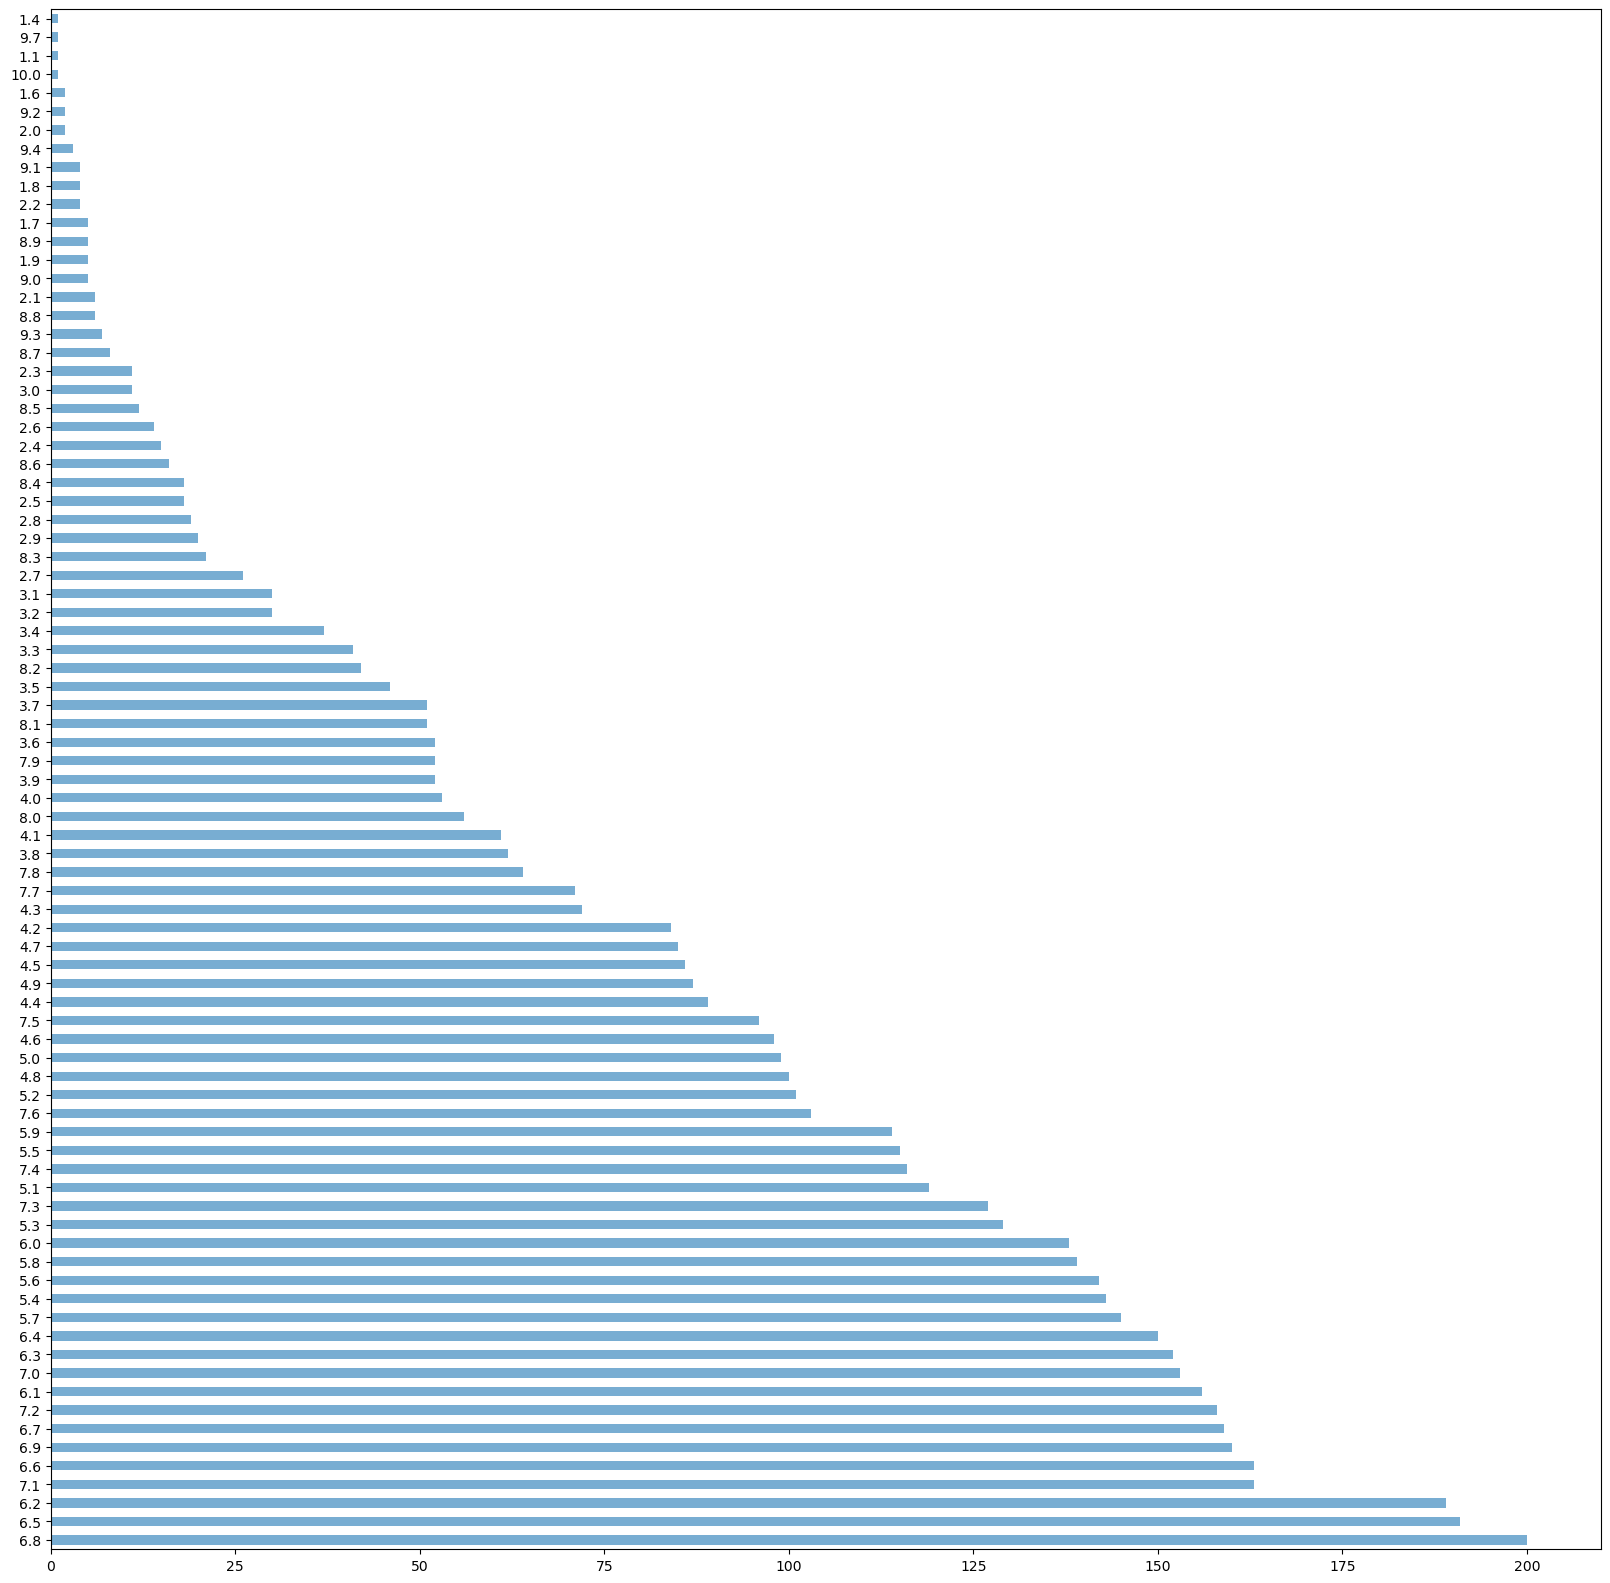

In [13]:
top_10 = df[10:]
top_10['Rating'].value_counts().plot(kind='barh',alpha=0.6,figsize=(20,20))
plt.show()

In [14]:
first_300 = df[300:]
first_300.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5655 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5655 non-null   object 
 1   Year      5655 non-null   object 
 2   Duration  5655 non-null   object 
 3   Genre     5655 non-null   object 
 4   Rating    5655 non-null   float64
 5   Votes     5655 non-null   object 
 6   Director  5655 non-null   object 
 7   Actor 1   5655 non-null   object 
 8   Actor 2   5655 non-null   object 
 9   Actor 3   5655 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.0+ KB


In [16]:
features = first_300[['Year','Rating']].values

In [17]:
labels = first_300[['Rating']].values

In [18]:
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

Text(0.5, 0, 'Rating')

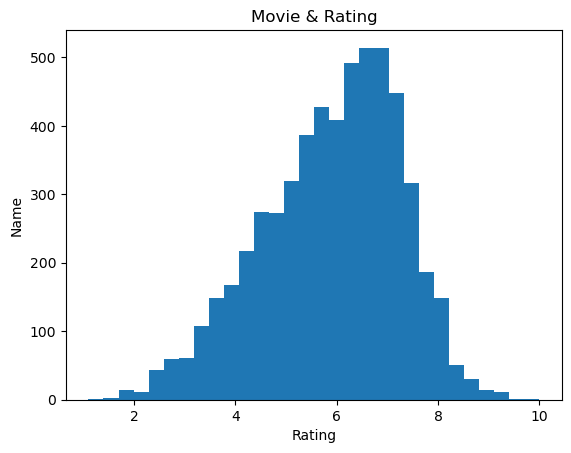

In [19]:
df.Rating.plot.hist(bins=30)
plt.title("Movie & Rating")
plt.ylabel('Name')
plt.xlabel('Rating')

In [20]:
df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+) #.')

In [21]:
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True).astype(int)

In [22]:
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

In [23]:
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''), errors='coerce')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5655 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1 non-null      object 
 1   Year      5655 non-null   int32  
 2   Duration  5655 non-null   int64  
 3   Genre     5655 non-null   object 
 4   Rating    5655 non-null   float64
 5   Votes     5655 non-null   int64  
 6   Director  5655 non-null   object 
 7   Actor 1   5655 non-null   object 
 8   Actor 2   5655 non-null   object 
 9   Actor 3   5655 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 463.9+ KB


In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
import plotly.express as px

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5655 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1 non-null      object 
 1   Year      5655 non-null   int32  
 2   Duration  5655 non-null   int64  
 3   Genre     5655 non-null   object 
 4   Rating    5655 non-null   float64
 5   Votes     5655 non-null   int64  
 6   Director  5655 non-null   object 
 7   Actor 1   5655 non-null   object 
 8   Actor 2   5655 non-null   object 
 9   Actor 3   5655 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 463.9+ KB


In [30]:
X = df[[ 'Year', 'Votes', 'Duration']]
y = df['Rating']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
y_train_transformed = lab.fit_transform(y_train)
logreg = LogisticRegression()
logreg.fit(X_train, y_train_transformed)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train_transformed)*100,2)
acc_log

3.87

In [41]:
svc = SVC()
svc.fit(X_train, y_train_transformed)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train_transformed) * 100, 2)
acc_svc

4.35

In [44]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train_transformed)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train_transformed) * 100, 2)
acc_knn

35.72

In [45]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train_transformed)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train_transformed) * 100, 2)
acc_gaussian

4.22

In [46]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train_transformed)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train_transformed) * 100, 2)
acc_perceptron

1.41

In [47]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train_transformed)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train_transformed) * 100, 2)
acc_linear_svc

2.48

In [48]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train_transformed)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train_transformed) * 100, 2)
acc_sgd

1.81

In [49]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train_transformed)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train_transformed) * 100, 2)
acc_decision_tree

99.8

In [50]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train_transformed)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train_transformed)
acc_random_forest = round(random_forest.score(X_train, y_train_transformed) * 100, 2)
acc_random_forest

99.8

In [51]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,99.80
8,Decision Tree,99.80
1,KNN,35.72
0,Support Vector Machines,4.35
4,Naive Bayes,4.22
2,Logistic Regression,3.87
7,Linear SVC,2.48
6,Stochastic Gradient Decent,1.81
5,Perceptron,1.41


In [52]:
X.head()

,Year,Votes,Duration
1,2019,8,109
3,2019,35,110
5,1997,827,147
6,2005,1086,142
8,2012,326,82


In [53]:
y.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64